# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) Diabetes</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.

Veri seti aşağıdaki özellikleri içermektedir:

   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

Bu veri seti, makine öğrenimi algoritmalarını eğitmek ve diyabet hastalığının tahmin edilmesi gibi ikili sınıflandırma problemlerinde kullanılmak üzere yaygın bir şekilde kullanılır. Veri seti, özellikle veri önişleme, özellik mühendisliği ve sınıflandırma algoritmalarının performanslarının karşılaştırılması gibi konularda kullanılır.

Veri setinin kullanıldığı tipik uygulamalar arasında, hangi hasta profillerinin diyabet riski taşıdığını anlamak, hangi özelliklerin diyabet olasılığını artırdığını belirlemek ve diyabet teşhisinin otomatik olarak konmasına yardımcı olacak tahmin modelleri geliştirmek bulunur.

Veri setinin doğası gereği, bazı özelliklerin eksik olabileceği veya dengesiz bir sınıf dağılımına sahip olabileceği gibi zorluklar içerebileceğini unutmamak önemlidir. Bu tür zorluklar, veri temizleme, eksik veri imputasyonu, dengesiz veri setlerini ele alma ve model doğrulama teknikleri gibi makine öğrenimi konularını derinlemesine inceleme fırsatı sunar.

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [3]:
df.shape

(768, 9)

## Exploratory Data Analiysis and Viaualization (EDA & Data Viz)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.Outcome.value_counts(normalize = True)

0   0.651
1   0.349
Name: Outcome, dtype: float64

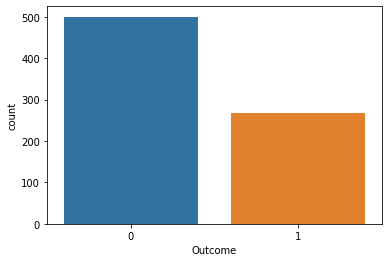

In [10]:
sns.countplot(data = df, x = "Outcome");

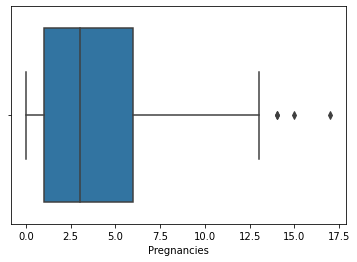

In [13]:
sns.boxplot(data =df, x="Pregnancies");

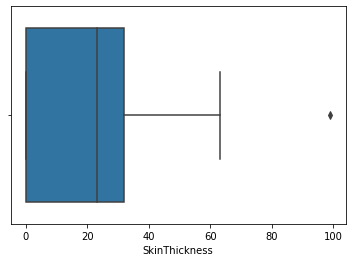

In [14]:
sns.boxplot(data =df, x="SkinThickness");

In [15]:
df = df[df.SkinThickness<70]

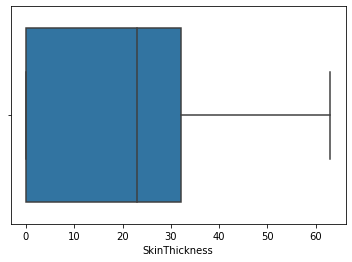

In [16]:
sns.boxplot(data =df, x="SkinThickness");

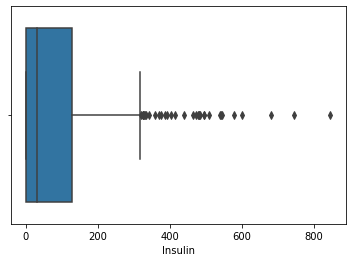

In [17]:
sns.boxplot(data =df, x="Insulin");

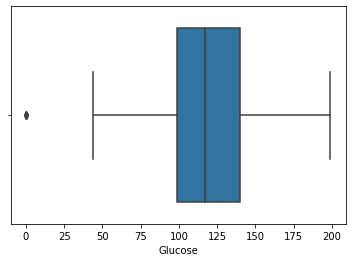

In [18]:
sns.boxplot(data =df, x="Glucose");

In [19]:
df = df[df.Glucose>0]

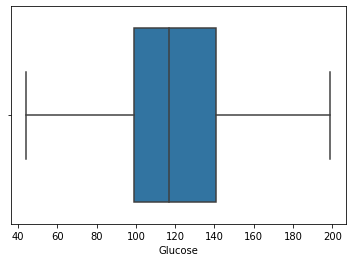

In [20]:
sns.boxplot(data =df, x="Glucose");

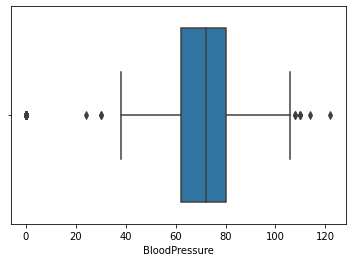

In [21]:
sns.boxplot(data =df, x="BloodPressure");

In [22]:
df = df[df.BloodPressure>35]

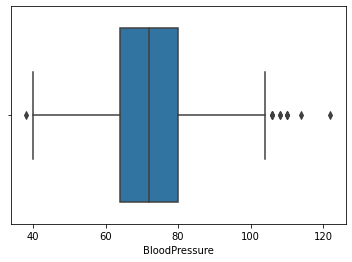

In [23]:
sns.boxplot(data =df, x="BloodPressure");

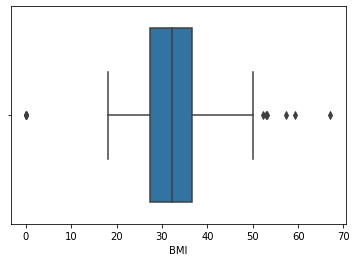

In [24]:
sns.boxplot(data =df, x="BMI");

In [25]:
df = df[df.BMI>0]

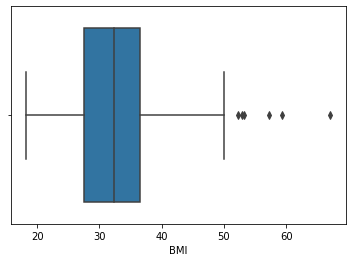

In [26]:
sns.boxplot(data =df, x="BMI");

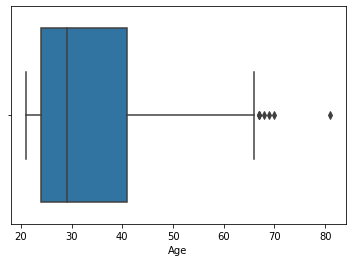

In [28]:
sns.boxplot(data =df, x="Age");

In [29]:
df = df[df.Age<74]

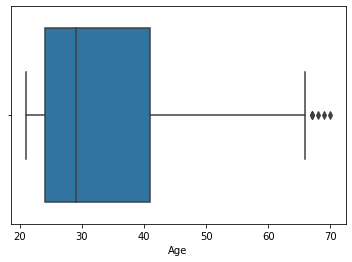

In [30]:
sns.boxplot(data =df, x="Age");

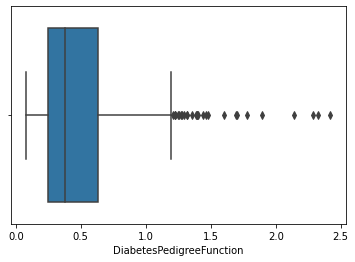

In [31]:
sns.boxplot(data =df, x="DiabetesPedigreeFunction");

In [32]:
df.shape

(719, 9)

In [33]:
df.Outcome.value_counts()

0    472
1    247
Name: Outcome, dtype: int64

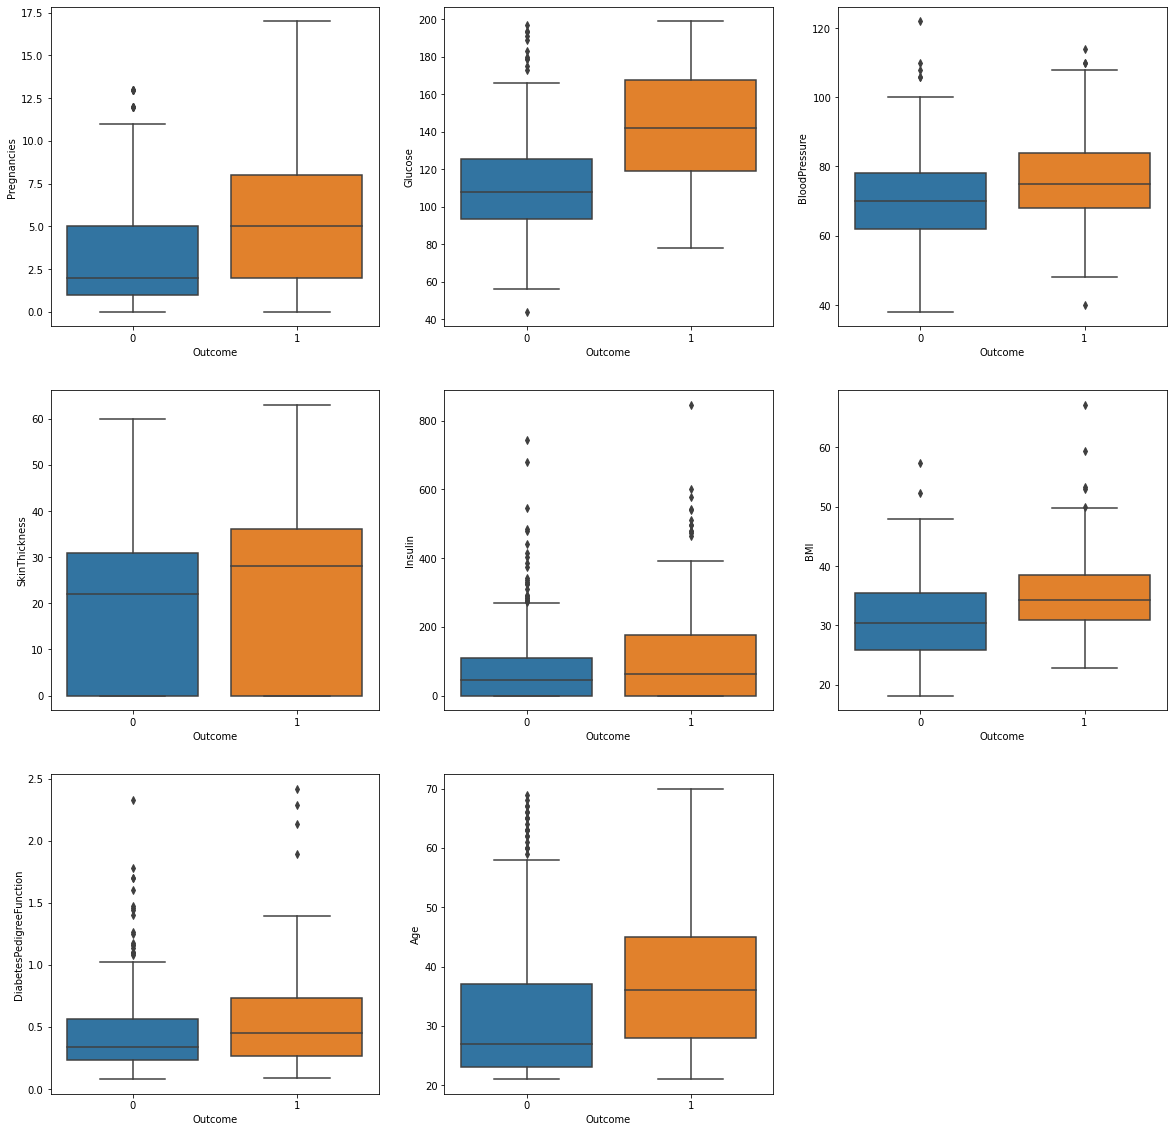

In [34]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

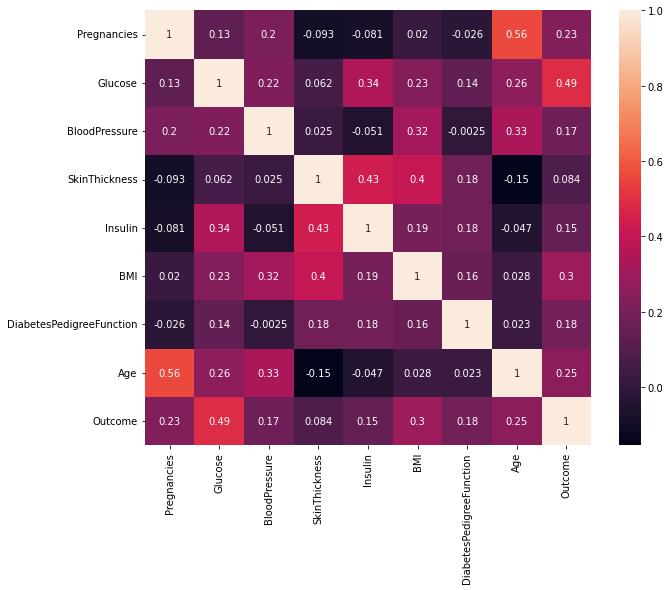

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True);

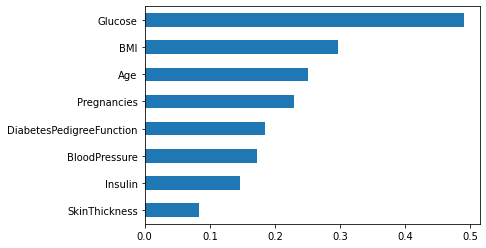

In [38]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh();

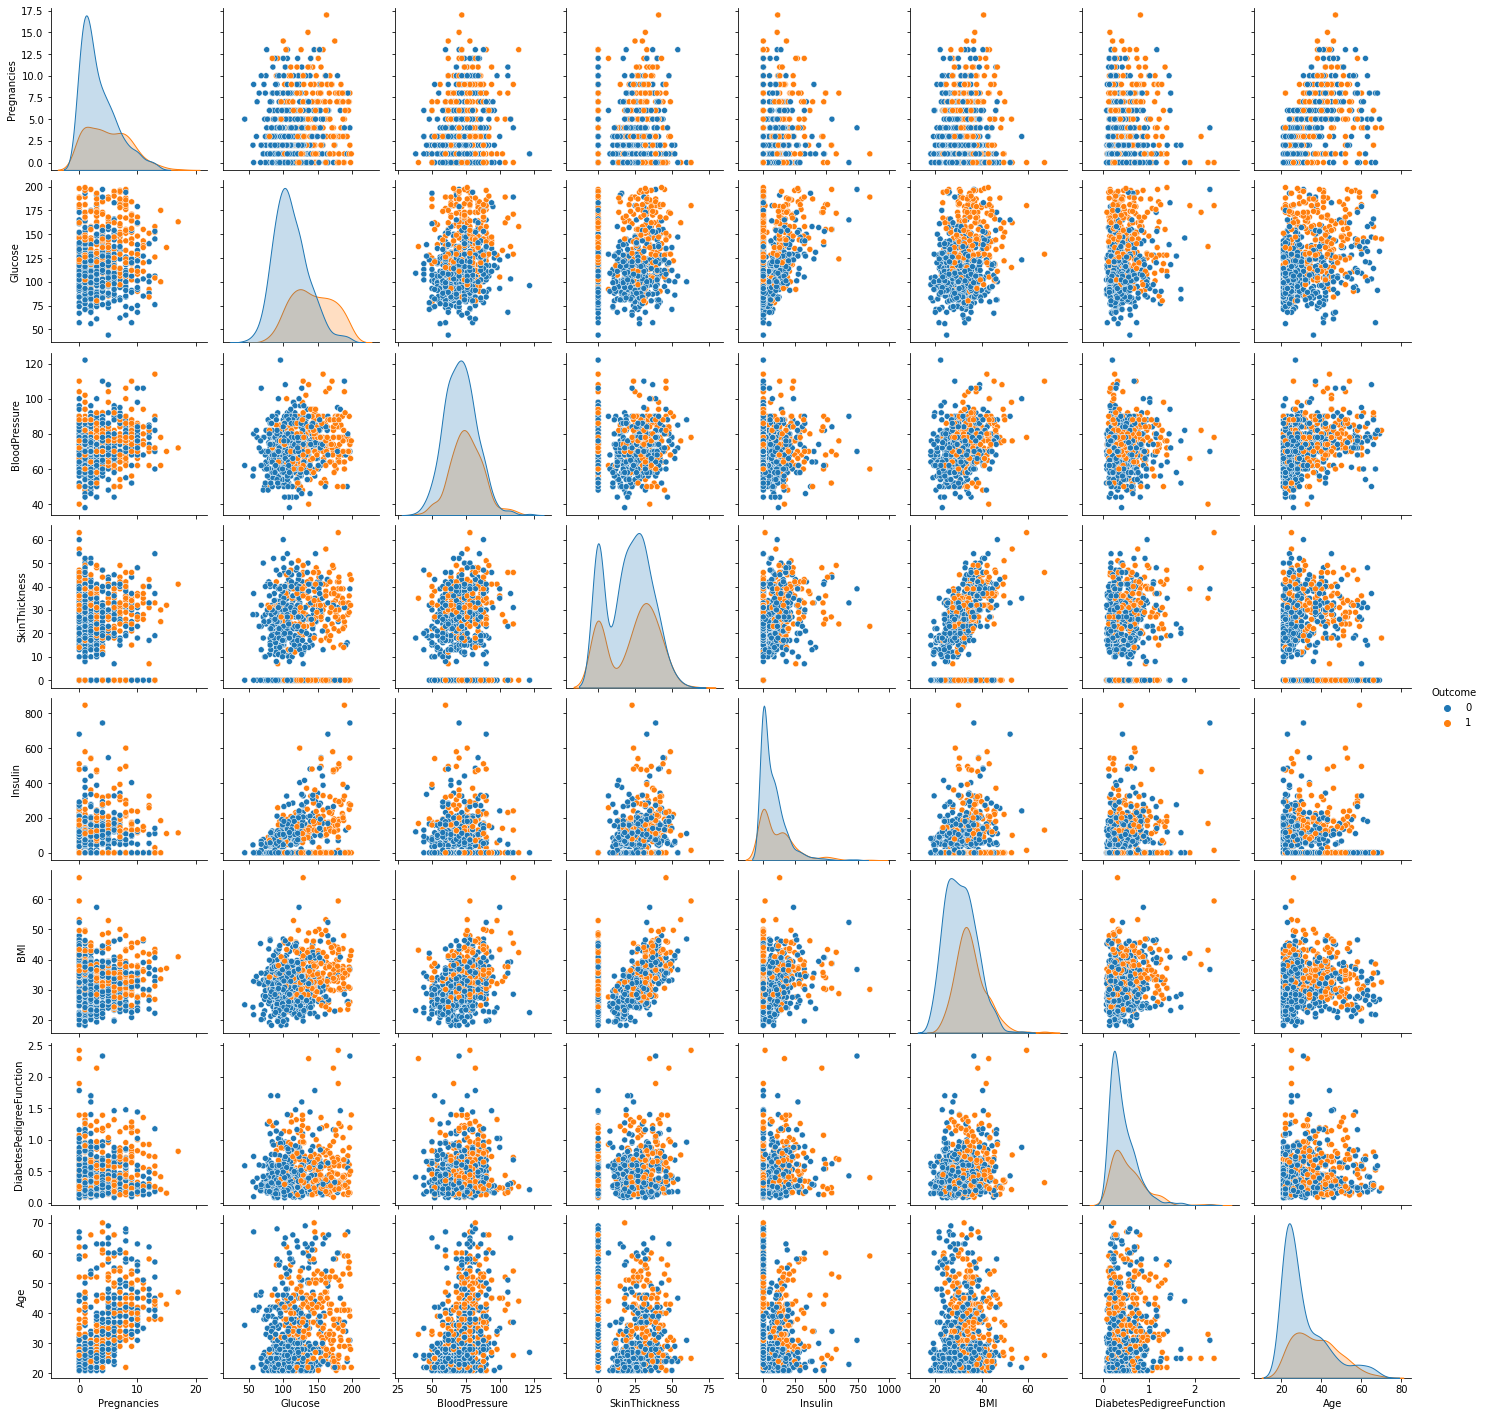

In [40]:
sns.pairplot(df, hue = "Outcome");

## Train | Test Split

### Target ve Features Ayır

In [42]:
X = df.drop(["Outcome"], axis = 1)
y = df["Outcome"]

### Train | Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    stratify=y, 
                                                    random_state = 42)

## Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Modelling

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
log_model = LogisticRegression()

In [50]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [51]:
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [52]:
test_data = pd.concat([X_test, y_test], axis = 1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:, 1]
test_data.sample(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
719,5,97,76,27,0,35.600,0.378,52,1,0,0.240
68,1,95,66,13,38,19.600,0.334,25,0,0,0.032
226,0,101,76,0,0,35.700,0.198,26,0,0,0.106
403,9,72,78,25,0,31.600,0.280,38,0,0,0.102
368,3,81,86,16,66,27.500,0.306,22,0,0,0.037
756,7,137,90,41,0,32.000,0.391,39,0,1,0.518
476,2,105,80,45,191,33.700,0.711,29,1,0,0.169
99,1,122,90,51,220,49.700,0.325,31,1,0,0.455
542,10,90,85,32,0,34.900,0.825,56,1,0,0.388
288,4,96,56,17,49,20.800,0.340,26,0,0,0.057
